In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
tf.__version__

'2.0.0'

In [3]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

In [4]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
cars['output'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

In [5]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

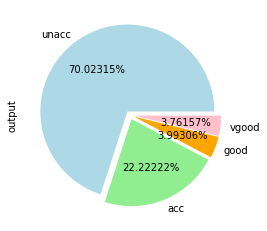

In [6]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [7]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [8]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

In [19]:
y = labels
y.shape

(1728, 4)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [16]:
type(y)

pandas.core.frame.DataFrame

In [26]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [27]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Train on 1105 samples, validate on 277 samples
Epoch 1/50
1105/1105 [==============================] - 0s 452us/sample - loss: 1.1947 - acc: 0.4661 - val_loss: 0.9448 - val_acc: 0.6498
Epoch 2/50
1105/1105 [==============================] - 0s 281us/sample - loss: 0.6929 - acc: 0.7213 - val_loss: 0.7047 - val_acc: 0.6715
Epoch 3/50
1105/1105 [==============================] - 0s 309us/sample - loss: 0.5180 - acc: 0.7783 - val_loss: 0.5838 - val_acc: 0.7365
Epoch 4/50
1105/1105 [==============================] - 0s 307us/sample - loss: 0.4193 - acc: 0.8443 - val_loss: 0.5091 - val_acc: 0.8087
Epoch 5/50
1105/1105 [==============================] - 0s 281us/sample - loss: 0.3645 - acc: 0.8760 - val_loss: 0.4759 - val_acc: 0.7870
Epoch 6/50
1105/1105 [==============================] - 0s 287us/sample - loss: 0.3297 - acc: 0.8833 - val_loss: 0.4298 - val_acc: 0.8484
Epoch 7/50
1105/1105 [==============================] - 0s 293us/sample - loss: 0.3012 - acc: 0.8950 - val_loss: 0.3982 - val

In [29]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

346/346 [==============================] - 0s 49us/sample - loss: 0.0875 - acc: 0.9624
Test Score: 0.08751183128081305
Test Accuracy: 0.96242774
